In [1]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model  import LinearRegression,Ridge
from category_encoders import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline

In [2]:
def wrangle(filepath):
    df = pd.read_csv(filepath)
    # encode the category data in to binary representation
    df["Extracurricular Activities"] = df["Extracurricular Activities"].map({"Yes":1,"No":0})
    return df

In [5]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [6]:
correlation = df.select_dtypes("number").drop(columns = "Performance Index").corr()
correlation

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced
Hours Studied,1.000000,-0.012390,0.003873,0.001245,0.017463
Previous Scores,-0.012390,1.000000,0.008369,0.005944,0.007888
Extracurricular Activities,0.003873,0.008369,1.000000,-0.023284,0.013103
Sleep Hours,0.001245,0.005944,-0.023284,1.000000,0.003990
Sample Question Papers Practiced,0.017463,0.007888,0.013103,0.003990,1.000000


<Axes: >

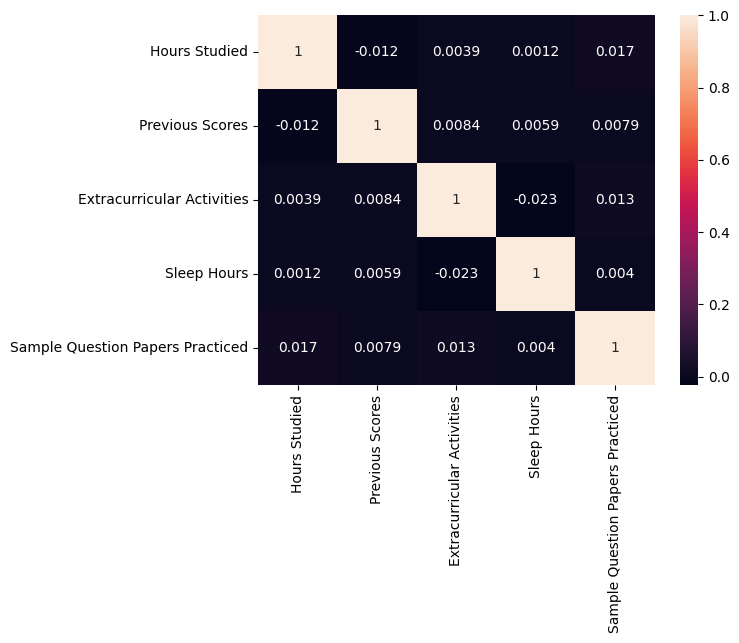

In [7]:
sns.heatmap(correlation,annot=True)

In [8]:
# Split the data
target = "Performance Index"
y_train = df[target]
X_train = df.drop(columns = target)

In [9]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean]*len(y_train)
mae_baseline = mean_absolute_error(y_train,y_pred_baseline)
mae_baseline

16.20355344

In [10]:
# Iterate 
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [21]:
mae_pred = mean_absolute_error(y_train,model.predict(X_train))
mae_pred

1.617482277939707

In [43]:
intercept = model.intercept_.round(2)
coefficients = model.coef_.round(2)

In [45]:
feature_names = X_train.columns

In [47]:
feat_imp = pd.Series(coefficients,index = feature_names)
feat_imp

Hours Studied                       2.85
Previous Scores                     1.02
Extracurricular Activities          0.61
Sleep Hours                         0.48
Sample Question Papers Practiced    0.19
dtype: float64

In [63]:
print(f"performance = {intercept}")
for f, c in feat_imp.items():
    print(f"+ ({round(c,2)}*{f})")

performance = -34.08
+ (2.85*Hours Studied)
+ (1.02*Previous Scores)
+ (0.61*Extracurricular Activities)
+ (0.48*Sleep Hours)
+ (0.19*Sample Question Papers Practiced)


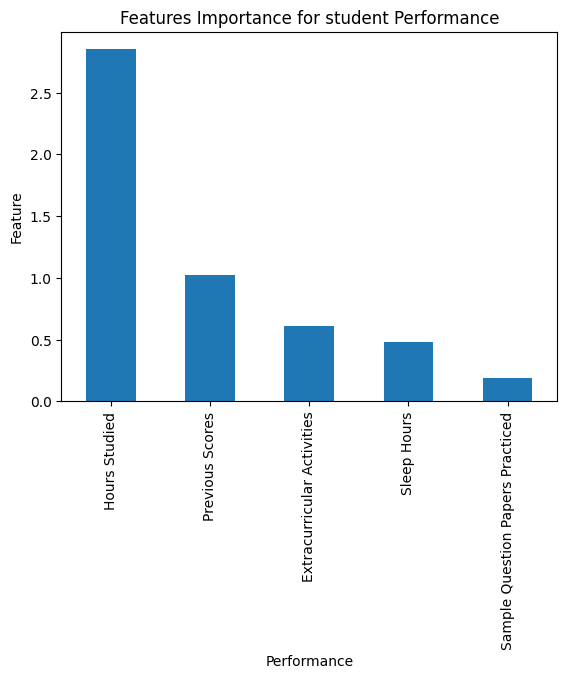

In [67]:
feat_imp.plot(kind = "bar")
plt.xlabel("Performance")
plt.ylabel("Feature")
plt.title("Features Importance for student Performance");